In [1]:
from greedy_mcmc_attack import *
from data_collection.recordings import *
import sys
sys.path.append("../../")
from src.models.gcn import *
from src.models.gat import *
from src.models.gsage import *

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
# dataset_directory = "../Cora"
cora_dataset = Planetoid(root='', name='Citeseer')
data = cora_dataset[0].to(device)
print(data)

Data(x=[3327, 3703], edge_index=[2, 9104], y=[3327], train_mask=[3327], val_mask=[3327], test_mask=[3327])


In [4]:
edges_to_add = None

In [5]:
model = GCN(data.x.shape[1], cora_dataset.num_classes, [16]).to(device)

In [6]:
model_save_path = "../models/citeseer_gcn_model.pth"
list_save_path = "../attacks/citeseer_gcn_edges.pth"
# # multi_metattack_edges_list.pth
# list_save_path = "multi_metattack_edges_list.pth"

In [7]:
model, edges_to_add, train = load_model_and_edges(model_save_path, list_save_path, model, device)

In [8]:
# Get initial accuracy
initial_loss, initial_accuracy = train.test(data)
print(f"Initial Accuracy: {initial_accuracy}")
print(f"Initial Loss: {initial_loss}")

Initial Accuracy: 0.581
Initial Loss: 3.921365737915039


In [9]:
G, initial_edge_count, ptb_rate, budget = initialize(data, _ptb_rate=0.15)

In [10]:
full_metattack_acc, full_metattack_loss, full_metattack_itrs = two_phase_attack_mcmc(data, train, model, 0.0, edges_to_add, binary_fn, constant_fn, device, is_reversed=False, verbose=True)

Peturbing graph...:   0%|          | 0/341 [00:00<?, ?it/s]

In [11]:
splits = [0.0, 0.5, 0.7, 0.9]
# splits = [0.9]
split_dic_acc = defaultdict(list)
split_dic_loss = defaultdict(list)
itrs_one = defaultdict(int)

In [12]:
for s in splits:
    if s == 0.0:
        split_dic_acc[s], split_dic_loss[s], itrs_one[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_acc[s], split_dic_loss[s], itrs_one[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, binary_fn, constant_fn, device, is_reversed=True, verbose=True)

Peturbing graph...:   0%|          | 0/170 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: 2.384185791015625e-07, master_dirty_delta: 0.0
Attempt: 1, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: -0.0005707740783691406, master_dirty_delta: -0.0007276535034179688
Attempt: 2, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: 2.384185791015625e-07, master_dirty_delta: 0.0
Attempt: 3, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: -0.0009064674377441406, master_dirty_delta: -0.0012507438659667969
Attempt: 4, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: 2.384185791015625e-07, master_dirty_delta: -0.0009374618530273438
Attempt: 5, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: -0.0013685226440429688, master_dirty_delta: -0.0014472007751464844
Attempt: 6, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: 0.009374141693115234, master_dirty_delta: 0.009417057037353516
Attempt: 21, Selected: 10
max_change: 0.0392

Peturbing graph...:   0%|          | 0/102 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.03921365737915039, master_clean_delta: -2.384185791015625e-07, master_dirty_delta: 2.384185791015625e-07
Attempt: 18, Selected: 10
max_change: 0.03921365737915039, master_clean_delta: 0.03235626220703125, master_dirty_delta: 0.036289215087890625
Attempt: 35, Selected: 20
max_change: 0.03921365737915039, master_clean_delta: 0.03593611717224121, master_dirty_delta: 0.0407862663269043
Attempt: 36, Selected: 20
max_change: 0.03921365737915039, master_clean_delta: 0.03682756423950195, master_dirty_delta: 0.04167795181274414
Attempt: 51, Selected: 30
max_change: 0.03921365737915039, master_clean_delta: 0.03827810287475586, master_dirty_delta: 0.08605384826660156
Attempt: 64, Selected: 40
max_change: 0.03921365737915039, master_clean_delta: 0.03664827346801758, master_dirty_delta: 0.08793258666992188
Attempt: 84, Selected: 50
max_change: 0.03921365737915039, master_clean_delta: 0.061522483825683594, master_dirty_delta: 0.11215353012084961
Attempt: 85, Sel

Peturbing graph...:   0%|          | 0/34 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.03921365737915039, master_clean_delta: -2.384185791015625e-07, master_dirty_delta: 0.0
Attempt: 19, Selected: 10
max_change: 0.03921365737915039, master_clean_delta: 0.03235816955566406, master_dirty_delta: 0.03513288497924805
Attempt: 20, Selected: 10
max_change: 0.03921365737915039, master_clean_delta: 0.03235793113708496, master_dirty_delta: 0.03648948669433594
Attempt: 21, Selected: 10
max_change: 0.03921365737915039, master_clean_delta: 0.0320131778717041, master_dirty_delta: 0.03635096549987793
Attempt: 22, Selected: 10
max_change: 0.03921365737915039, master_clean_delta: 0.03235769271850586, master_dirty_delta: 0.036489009857177734
Attempt: 41, Selected: 20
max_change: 0.03921365737915039, master_clean_delta: 0.039101600646972656, master_dirty_delta: 0.04323267936706543
Attempt: 52, Selected: 30
max_change: 0.03921365737915039, master_clean_delta: 0.03665518760681152, master_dirty_delta: 0.040456533432006836
Attempt: 66, Selected: 40
max_cha

In [13]:
record1 = Recording(split_dic_loss, split_dic_acc, itrs_one, Model.GCN, Dataset.CITESEER, AcceptFn.CONSTANT, SelectFn.BINARY, Reverse.REVERSED)
record1.save(f'data_collection/{"mcmc"}_{"gcn"}_{"citeseer"}_{"constant"}_{"binary"}_{"reversed"}_results.pkl')

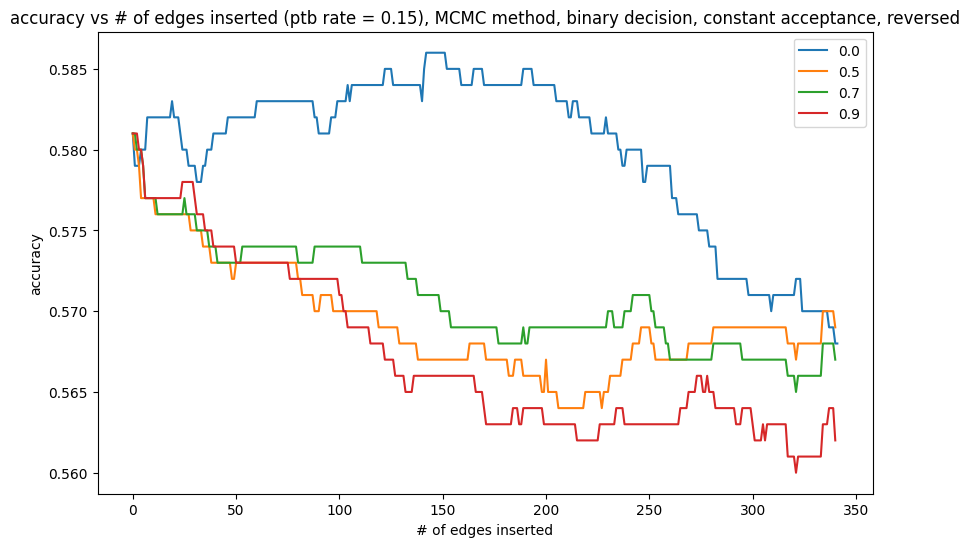

In [14]:
plot_results(split_dic_acc, ptb_rate, "MCMC", "binary", "constant", "accuracy", "reversed")

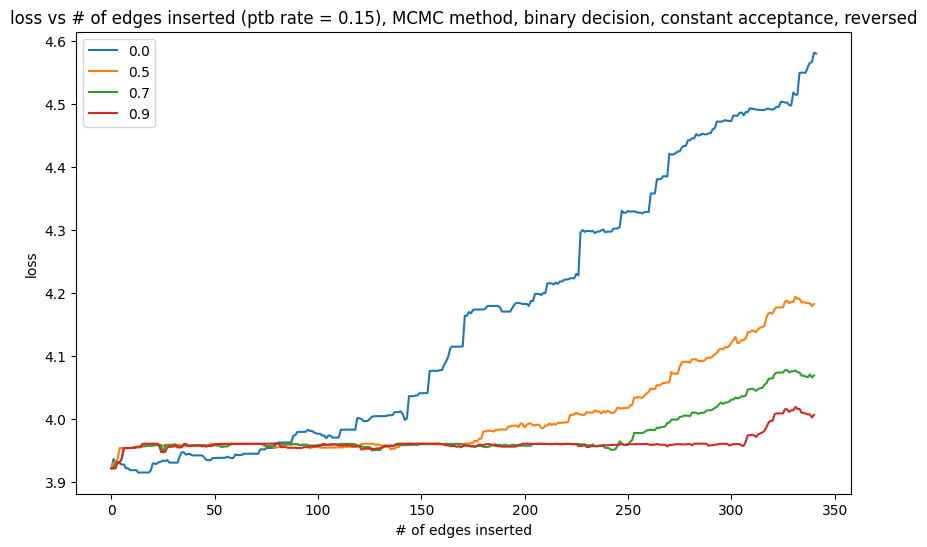

In [15]:
plot_results(split_dic_loss, ptb_rate, "MCMC", "binary", "constant", "loss", "reversed")

##### ideally, we could show some metric, where (change in loss after hidden for %) > (% * max change in loss)

In [16]:
split_dic_decreasing_acc = defaultdict(list)
itrs_two = defaultdict(int)
split_dic_decreasing_loss = defaultdict(list)

In [17]:
for s in splits:
    if s == 0.0:
        split_dic_decreasing_acc[s], split_dic_decreasing_loss[s], itrs_two[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_decreasing_acc[s], split_dic_decreasing_loss[s], itrs_two[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, binary_fn, increasing_fn, device, is_reversed=True, verbose=True)

Peturbing graph...:   0%|          | 0/170 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.03921365737915039, master_clean_delta: -2.384185791015625e-07, master_dirty_delta: 0.0
Attempt: 30, Selected: 10
max_change: 0.03921365737915039, master_clean_delta: 0.012988805770874023, master_dirty_delta: 0.015551090240478516
Attempt: 31, Selected: 10
max_change: 0.03921365737915039, master_clean_delta: 0.0017306804656982422, master_dirty_delta: 0.004013538360595703
Attempt: 51, Selected: 20
max_change: 0.03921365737915039, master_clean_delta: 0.0034356117248535156, master_dirty_delta: 0.005797386169433594
Attempt: 65, Selected: 30
max_change: 0.03921365737915039, master_clean_delta: 0.0023336410522460938, master_dirty_delta: 0.00872945785522461
Attempt: 85, Selected: 40
max_change: 0.03921365737915039, master_clean_delta: 0.03251314163208008, master_dirty_delta: 0.08246946334838867
Attempt: 86, Selected: 40
max_change: 0.03921365737915039, master_clean_delta: 0.007470607757568359, master_dirty_delta: 0.057598114013671875
Attempt: 102, Selected:

Peturbing graph...:   0%|          | 0/102 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.03921365737915039, master_clean_delta: 0.0, master_dirty_delta: 2.384185791015625e-07
Attempt: 28, Selected: 10
max_change: 0.03921365737915039, master_clean_delta: 0.0006566047668457031, master_dirty_delta: 0.0010933876037597656
Attempt: 29, Selected: 10
max_change: 0.03921365737915039, master_clean_delta: 0.0006566047668457031, master_dirty_delta: 0.0010929107666015625
Attempt: 30, Selected: 10
max_change: 0.03921365737915039, master_clean_delta: 0.0006566047668457031, master_dirty_delta: 0.001093149185180664
Attempt: 46, Selected: 20
max_change: 0.03921365737915039, master_clean_delta: 0.002171039581298828, master_dirty_delta: 0.002038717269897461
Attempt: 47, Selected: 20
max_change: 0.03921365737915039, master_clean_delta: 0.00027179718017578125, master_dirty_delta: 0.0003337860107421875
Attempt: 62, Selected: 30
max_change: 0.03921365737915039, master_clean_delta: -0.00023937225341796875, master_dirty_delta: 0.00368499755859375
Attempt: 76, S

Peturbing graph...:   0%|          | 0/34 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: 2.384185791015625e-07, master_dirty_delta: 2.384185791015625e-07
Attempt: 23, Selected: 10
max_change: 0.0392136549949646, master_clean_delta: 0.0007460117340087891, master_dirty_delta: 0.0007460117340087891
Attempt: 24, Selected: 10
max_change: 0.0392136549949646, master_clean_delta: 0.0004017353057861328, master_dirty_delta: 0.0006077289581298828
Attempt: 25, Selected: 10
max_change: 0.0392136549949646, master_clean_delta: 0.0007457733154296875, master_dirty_delta: 0.0007457733154296875
Attempt: 55, Selected: 20
max_change: 0.0392136549949646, master_clean_delta: 0.0010828971862792969, master_dirty_delta: 0.0014891624450683594
Attempt: 70, Selected: 30
max_change: 0.0392136549949646, master_clean_delta: 0.0023398399353027344, master_dirty_delta: 0.002838611602783203
Attempt: 71, Selected: 30
max_change: 0.0392136549949646, master_clean_delta: 0.003159046173095703, master_dirty_delta: 0.003656625747680664
Atte

In [18]:
record1 = Recording(split_dic_decreasing_loss, split_dic_decreasing_acc, itrs_two, Model.GCN, Dataset.CITESEER, AcceptFn.INCREASING, SelectFn.BINARY, Reverse.REVERSED)
record1.save(f'data_collection/{"mcmc"}_{"gcn"}_{"citeseer"}_{"increasing"}_{"binary"}_{"reversed"}_results.pkl')

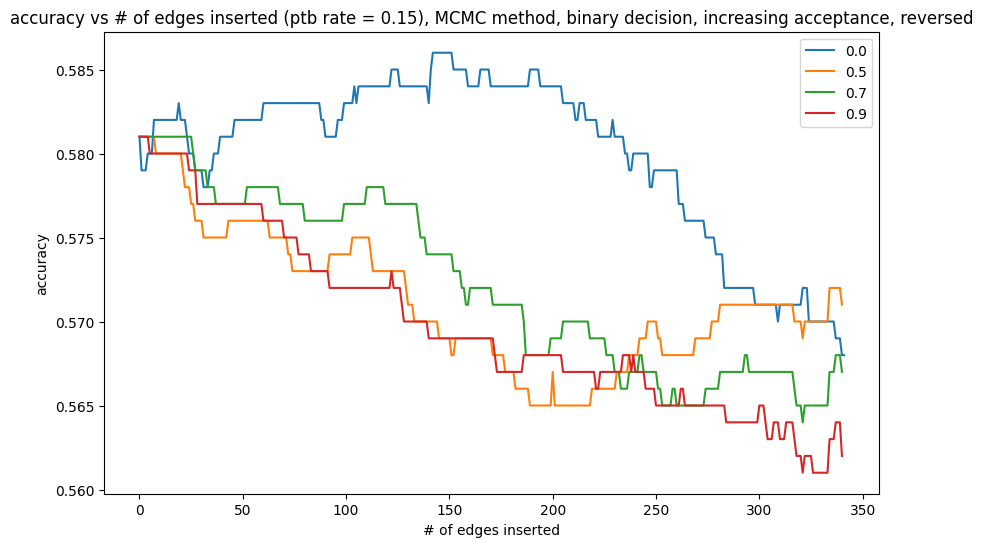

In [19]:
plot_results(split_dic_decreasing_acc, ptb_rate, "MCMC", "binary", "increasing", "accuracy", "reversed")

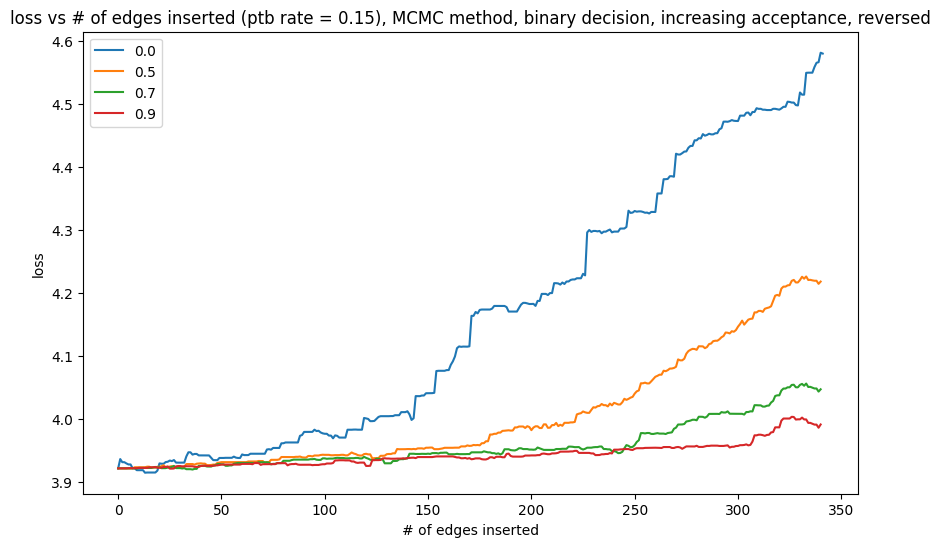

In [20]:
plot_results(split_dic_decreasing_loss, ptb_rate, "MCMC", "binary", "increasing", "loss", "reversed")

In [21]:
split_dic_decreasing_constant_acc = defaultdict(list)
split_dic_decreasing_constant_loss = defaultdict(list)
itrs_three = defaultdict(int)

In [22]:
for s in splits:
    if s == 0.0:
        split_dic_decreasing_constant_acc[s], split_dic_decreasing_constant_loss[s], itrs_three[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_decreasing_constant_acc[s], split_dic_decreasing_constant_loss[s], itrs_three[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, decreasing_fn, constant_fn, device, is_reversed=True, verbose=True)

Peturbing graph...:   0%|          | 0/170 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.03921365737915039, master_clean_delta: 0.0, master_dirty_delta: 0.0
Attempt: 15, Selected: 10
max_change: 0.03921365737915039, master_clean_delta: 0.03259682655334473, master_dirty_delta: 0.03657197952270508
Attempt: 16, Selected: 10
max_change: 0.03921365737915039, master_clean_delta: 0.03259682655334473, master_dirty_delta: 0.03657197952270508
Attempt: 17, Selected: 10
max_change: 0.03921365737915039, master_clean_delta: 0.03259682655334473, master_dirty_delta: 0.03705739974975586
Attempt: 47, Selected: 20
max_change: 0.03921365737915039, master_clean_delta: 0.03749489784240723, master_dirty_delta: 0.045803070068359375
Attempt: 84, Selected: 30
max_change: 0.03921365737915039, master_clean_delta: 0.06355500221252441, master_dirty_delta: 0.07537317276000977
Attempt: 85, Selected: 30
max_change: 0.03921365737915039, master_clean_delta: 0.03851199150085449, master_dirty_delta: 0.05050086975097656
Attempt: 86, Selected: 30
max_change: 0.0392136573791

Peturbing graph...:   0%|          | 0/102 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.03921365737915039, master_clean_delta: 0.0, master_dirty_delta: -2.384185791015625e-07
Attempt: 1, Selected: 0
max_change: 0.03921365737915039, master_clean_delta: -0.0005707740783691406, master_dirty_delta: -0.0005714893341064453
Attempt: 2, Selected: 0
max_change: 0.03921365737915039, master_clean_delta: -2.384185791015625e-07, master_dirty_delta: 0.0
Attempt: 19, Selected: 10
max_change: 0.03921365737915039, master_clean_delta: 0.0259854793548584, master_dirty_delta: 0.026911258697509766
Attempt: 46, Selected: 20
max_change: 0.03921365737915039, master_clean_delta: 0.038488149642944336, master_dirty_delta: 0.08325672149658203
Attempt: 80, Selected: 30
max_change: 0.03921365737915039, master_clean_delta: 0.0467376708984375, master_dirty_delta: 0.09900903701782227
Attempt: 81, Selected: 30
max_change: 0.03921365737915039, master_clean_delta: 0.03507804870605469, master_dirty_delta: 0.08734941482543945
Attempt: 82, Selected: 30
max_change: 0.039213

Peturbing graph...:   0%|          | 0/34 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.03921365737915039, master_clean_delta: 0.0, master_dirty_delta: 2.384185791015625e-07
Attempt: 15, Selected: 10
max_change: 0.03921365737915039, master_clean_delta: 0.025480031967163086, master_dirty_delta: 0.026404857635498047
Attempt: 43, Selected: 20
max_change: 0.03921365737915039, master_clean_delta: 0.03967571258544922, master_dirty_delta: 0.04138493537902832
Attempt: 44, Selected: 20
max_change: 0.03921365737915039, master_clean_delta: 0.037821292877197266, master_dirty_delta: 0.03912496566772461
Attempt: 45, Selected: 20
max_change: 0.03921365737915039, master_clean_delta: 0.02729654312133789, master_dirty_delta: 0.029668331146240234
Attempt: 46, Selected: 20
max_change: 0.03921365737915039, master_clean_delta: 0.03906989097595215, master_dirty_delta: 0.040373802185058594
Attempt: 117, Selected: 30
max_change: 0.03921365737915039, master_clean_delta: 0.03921246528625488, master_dirty_delta: 0.040839195251464844
Attempt: 201, Selected: 40
ma

In [23]:
record1 = Recording(split_dic_decreasing_constant_loss, split_dic_decreasing_constant_acc, itrs_three, Model.GCN, Dataset.CITESEER, AcceptFn.CONSTANT, SelectFn.DECAYING, Reverse.REVERSED)
record1.save(f'data_collection/{"mcmc"}_{"gcn"}_{"citeseer"}_{"constant"}_{"decaying"}_{"reversed"}_results.pkl')

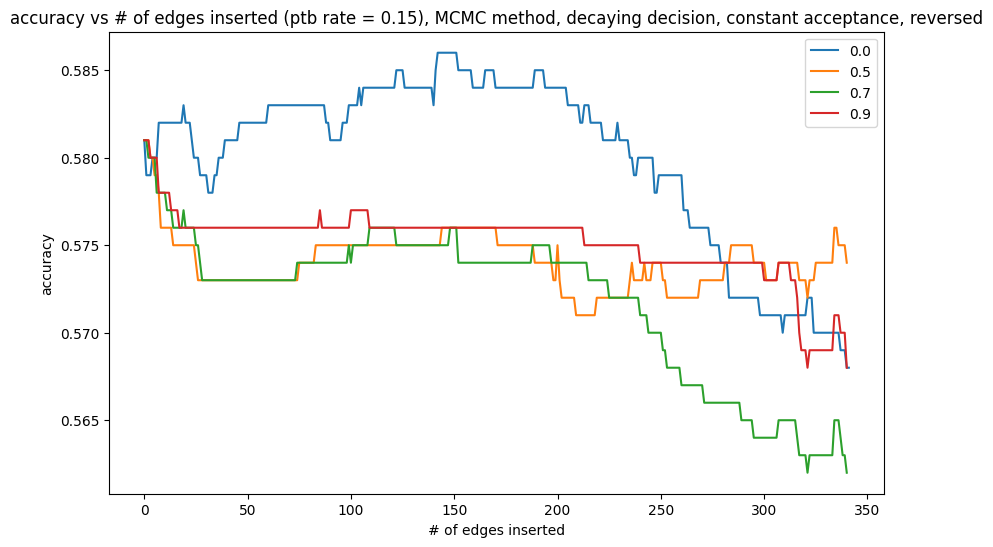

In [24]:
plot_results(split_dic_decreasing_constant_acc, ptb_rate, "MCMC", "decaying", "constant", "accuracy", "reversed")

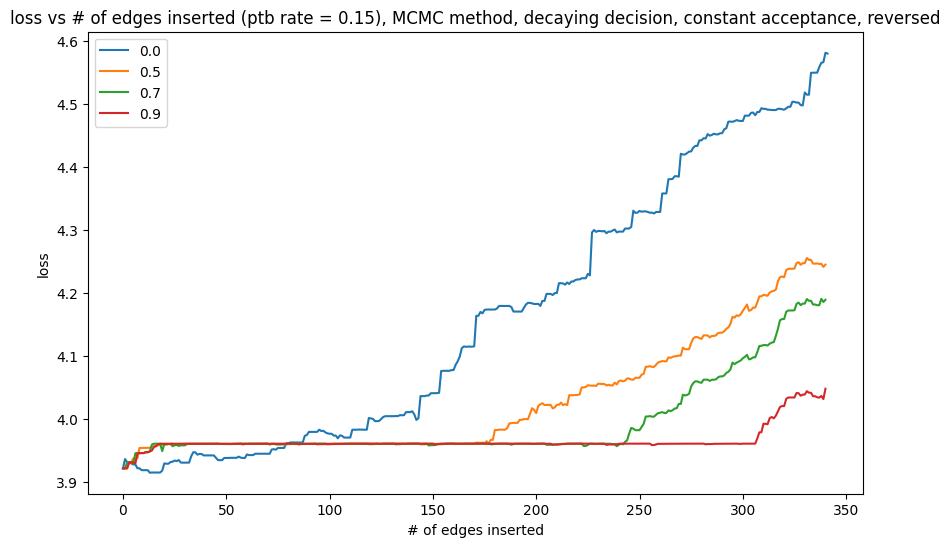

In [25]:
plot_results(split_dic_decreasing_constant_loss, ptb_rate, "MCMC", "decaying", "constant", "loss", "reversed")

In [26]:
split_dic_decreasing_gradual_acc = defaultdict(list)
split_dic_decreasing_gradual_loss = defaultdict(list)
itrs_four = defaultdict(int)

In [27]:
for s in splits:
    if s == 0.0:
        split_dic_decreasing_gradual_acc[s], split_dic_decreasing_gradual_loss[s], itrs_four[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_decreasing_gradual_acc[s], split_dic_decreasing_gradual_loss[s], itrs_four[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, decreasing_fn, increasing_fn, device, is_reversed=True, verbose=True)

Peturbing graph...:   0%|          | 0/170 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: 0.0, master_dirty_delta: 0.0
Attempt: 54, Selected: 10
max_change: 0.0392136549949646, master_clean_delta: 0.008466482162475586, master_dirty_delta: 0.01110982894897461
Attempt: 55, Selected: 10
max_change: 0.0392136549949646, master_clean_delta: 0.00258636474609375, master_dirty_delta: 0.00687408447265625
Attempt: 56, Selected: 10
max_change: 0.0392136549949646, master_clean_delta: 0.0015583038330078125, master_dirty_delta: 0.005393028259277344
Attempt: 81, Selected: 20
max_change: 0.0392136549949646, master_clean_delta: -0.000270843505859375, master_dirty_delta: 0.011065483093261719
Attempt: 82, Selected: 20
max_change: 0.0392136549949646, master_clean_delta: 0.0004932880401611328, master_dirty_delta: 0.009584903717041016
Attempt: 83, Selected: 20
max_change: 0.0392136549949646, master_clean_delta: -0.0004622936248779297, master_dirty_delta: 0.010933399200439453
Attempt: 84, Selected: 20
max_change: 0.0392136

Peturbing graph...:   0%|          | 0/102 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.03921365737915039, master_clean_delta: -2.384185791015625e-07, master_dirty_delta: 0.0
Attempt: 46, Selected: 10
max_change: 0.03921365737915039, master_clean_delta: 0.0013217926025390625, master_dirty_delta: 0.0010874271392822266
Attempt: 47, Selected: 10
max_change: 0.03921365737915039, master_clean_delta: -0.0005779266357421875, master_dirty_delta: -0.0006177425384521484
Attempt: 48, Selected: 10
max_change: 0.03921365737915039, master_clean_delta: 0.009430885314941406, master_dirty_delta: 0.009653329849243164
Attempt: 49, Selected: 10
max_change: 0.03921365737915039, master_clean_delta: -0.010806560516357422, master_dirty_delta: 0.03141021728515625
Attempt: 50, Selected: 10
max_change: 0.03921365737915039, master_clean_delta: 0.01177978515625, master_dirty_delta: 0.014813899993896484
Attempt: 51, Selected: 10
max_change: 0.03921365737915039, master_clean_delta: 0.0006706714630126953, master_dirty_delta: 0.001108407974243164
Attempt: 52, Selecte

Peturbing graph...:   0%|          | 0/34 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: 2.384185791015625e-07, master_dirty_delta: 0.0
Attempt: 1, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: -0.0005705356597900391, master_dirty_delta: -0.001753091812133789
Attempt: 2, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: 2.384185791015625e-07, master_dirty_delta: 0.0
Attempt: 3, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: -0.0009062290191650391, master_dirty_delta: -0.0012507438659667969
Attempt: 4, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: 2.384185791015625e-07, master_dirty_delta: 0.0
Attempt: 5, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: -0.0013685226440429688, master_dirty_delta: -0.001369476318359375
Attempt: 6, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: 0.009374380111694336, master_dirty_delta: 0.009373903274536133
Attempt: 7, Selected: 0
max_change: 0.0392136549949646, master_cl

In [28]:
record1 = Recording(split_dic_decreasing_gradual_loss, split_dic_decreasing_gradual_acc, itrs_four, Model.GCN, Dataset.CITESEER, AcceptFn.CONSTANT, SelectFn.DECAYING, Reverse.REVERSED)
record1.save(f'data_collection/{"mcmc"}_{"gcn"}_{"citeseer"}_{"increasing"}_{"decaying"}_{"reversed"}_results.pkl')

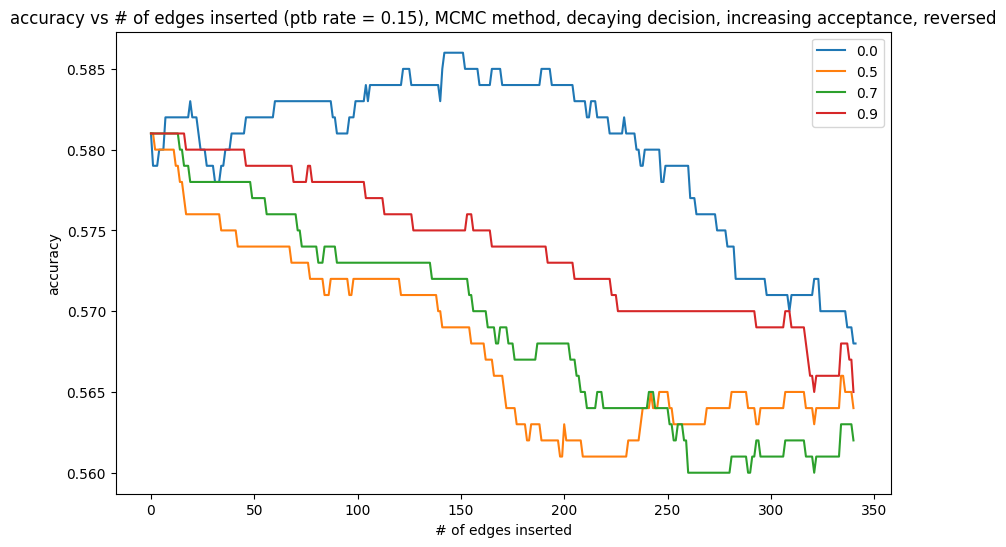

In [29]:
plot_results(split_dic_decreasing_gradual_acc, ptb_rate, "MCMC", "decaying", "increasing", "accuracy", "reversed")

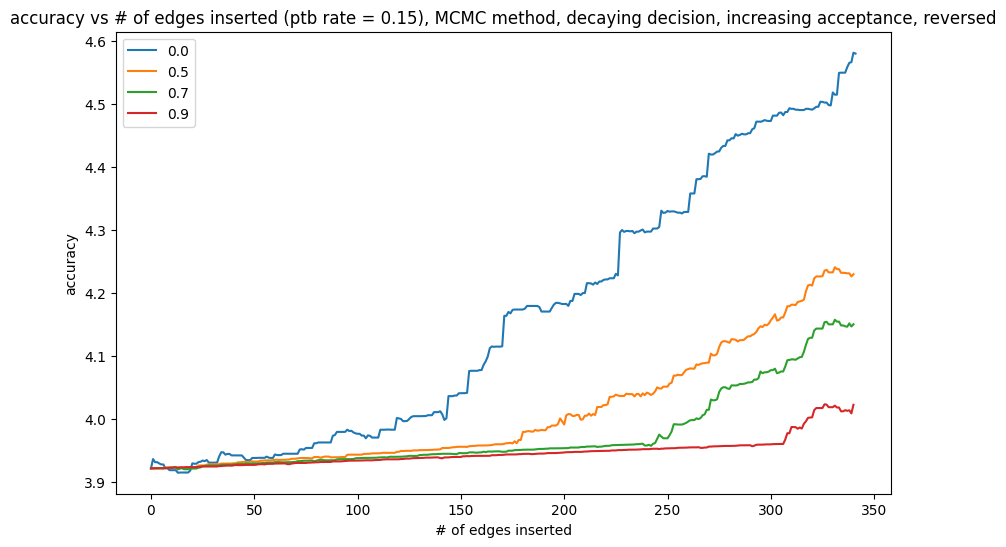

In [30]:
plot_results(split_dic_decreasing_gradual_loss, ptb_rate, "MCMC", "decaying", "increasing", "accuracy", "reversed")

# regular, secondary attack, not reversed

In [31]:
splits = [0.0, 0.5, 0.7, 0.9]
# splits = [0.9]
split_dic_acc = defaultdict(list)
split_dic_loss = defaultdict(list)
itrs_one = defaultdict(int)

In [32]:
for s in splits:
    if s == 0.0:
        split_dic_acc[s], split_dic_loss[s], itrs_one[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_acc[s], split_dic_loss[s], itrs_one[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, binary_fn, constant_fn, device, is_reversed=False, verbose=True)

Peturbing graph...:   0%|          | 0/170 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.03921365737915039, master_clean_delta: 0.0, master_dirty_delta: 0.0
Attempt: 17, Selected: 10
max_change: 0.03921365737915039, master_clean_delta: 0.03234696388244629, master_dirty_delta: 0.039331912994384766
Attempt: 34, Selected: 20
max_change: 0.03921365737915039, master_clean_delta: 0.036280155181884766, master_dirty_delta: 0.04299211502075195
Attempt: 53, Selected: 30
max_change: 0.03921365737915039, master_clean_delta: 0.03511691093444824, master_dirty_delta: 0.04333019256591797
Attempt: 66, Selected: 40
max_change: 0.03921365737915039, master_clean_delta: 0.037873268127441406, master_dirty_delta: 0.04530525207519531
Attempt: 67, Selected: 40
max_change: 0.03921365737915039, master_clean_delta: 0.04145312309265137, master_dirty_delta: 0.09559774398803711
Attempt: 68, Selected: 40
max_change: 0.03921365737915039, master_clean_delta: 0.03714394569396973, master_dirty_delta: 0.04553985595703125
Attempt: 69, Selected: 40
max_change: 0.03921365737

Peturbing graph...:   0%|          | 0/176 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/102 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: 2.384185791015625e-07, master_dirty_delta: -4.76837158203125e-07
Attempt: 1, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: -0.0005705356597900391, master_dirty_delta: -0.0005714893341064453
Attempt: 2, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: 0.0, master_dirty_delta: 0.0
Attempt: 21, Selected: 10
max_change: 0.0392136549949646, master_clean_delta: 0.034088850021362305, master_dirty_delta: 0.03802204132080078
Attempt: 39, Selected: 20
max_change: 0.0392136549949646, master_clean_delta: 0.03683018684387207, master_dirty_delta: 0.041680335998535156
Attempt: 53, Selected: 30
max_change: 0.0392136549949646, master_clean_delta: 0.037412405014038086, master_dirty_delta: 0.08518743515014648
Attempt: 65, Selected: 40
max_change: 0.0392136549949646, master_clean_delta: 0.042569637298583984, master_dirty_delta: 0.09385395050048828
Attempt: 66, Selected: 40
max_change: 0.03921365499

Peturbing graph...:   0%|          | 0/107 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/34 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: 0.0, master_dirty_delta: 2.384185791015625e-07
Attempt: 20, Selected: 10
max_change: 0.0392136549949646, master_clean_delta: 0.03235816955566406, master_dirty_delta: 0.035132646560668945
Attempt: 21, Selected: 10
max_change: 0.0392136549949646, master_clean_delta: 0.03235816955566406, master_dirty_delta: 0.03648948669433594
Attempt: 22, Selected: 10
max_change: 0.0392136549949646, master_clean_delta: 0.0320134162902832, master_dirty_delta: 0.03635120391845703
Attempt: 23, Selected: 10
max_change: 0.0392136549949646, master_clean_delta: 0.03235793113708496, master_dirty_delta: 0.036489248275756836
Attempt: 42, Selected: 20
max_change: 0.0392136549949646, master_clean_delta: 0.03910183906555176, master_dirty_delta: 0.04323291778564453
Attempt: 53, Selected: 30
max_change: 0.0392136549949646, master_clean_delta: 0.036655426025390625, master_dirty_delta: 0.04045701026916504
Attempt: 67, Selected: 40
max_change: 0.0

Peturbing graph...:   0%|          | 0/36 [00:00<?, ?it/s]

In [33]:
record1 = Recording(split_dic_loss, split_dic_acc, itrs_one, Model.GCN, Dataset.CITESEER, AcceptFn.CONSTANT, SelectFn.BINARY, Reverse.ATTACKED)
record1.save(f'data_collection/{"mcmc"}_{"gcn"}_{"citeseer"}_{"constant"}_{"binary"}_{"attacked"}_results.pkl')

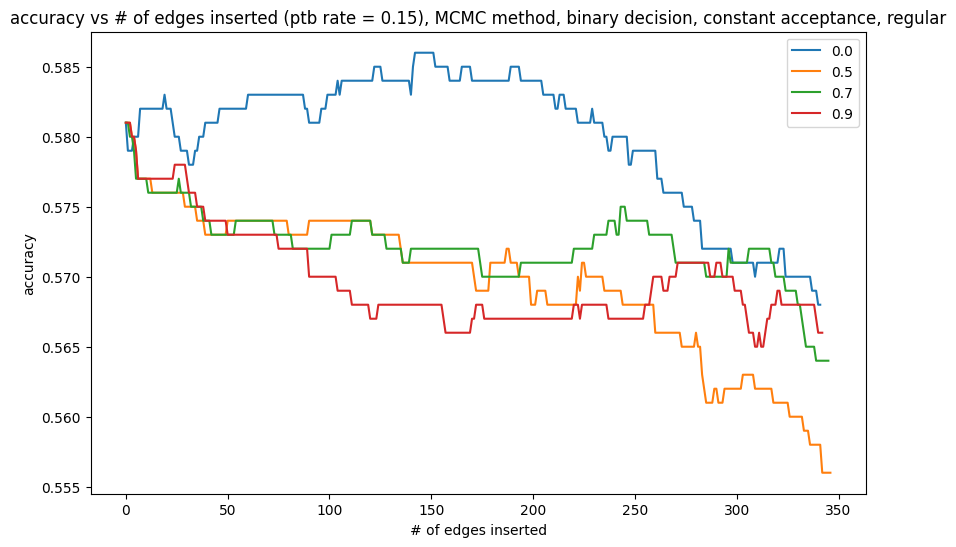

In [34]:
plot_results(split_dic_acc, ptb_rate, "MCMC", "binary", "constant", "accuracy", "regular")

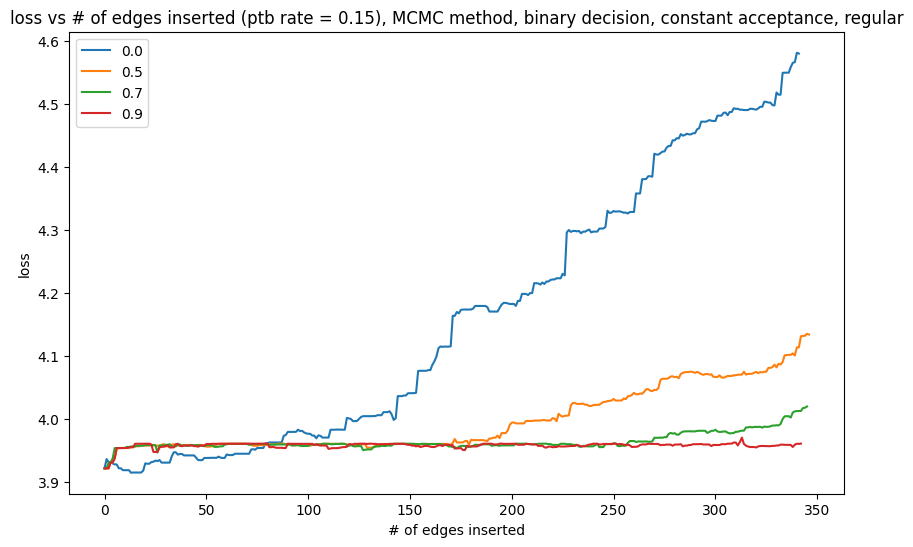

In [35]:
plot_results(split_dic_loss, ptb_rate, "MCMC", "binary", "constant", "loss", "regular")

##### ideally, we could show some metric, where (change in loss after hidden for %) > (% * max change in loss)

In [36]:
split_dic_decreasing_acc = defaultdict(list)
itrs_two = defaultdict(int)
split_dic_decreasing_loss = defaultdict(list)

In [37]:
for s in splits:
    if s == 0.0:
        split_dic_decreasing_acc[s], split_dic_decreasing_loss[s], itrs_two[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_decreasing_acc[s], split_dic_decreasing_loss[s], itrs_two[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, binary_fn, increasing_fn, device, is_reversed=False, verbose=True)

Peturbing graph...:   0%|          | 0/170 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: 2.384185791015625e-07, master_dirty_delta: 0.0
Attempt: 1, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: -0.0005707740783691406, master_dirty_delta: -0.0007276535034179688
Attempt: 2, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: 2.384185791015625e-07, master_dirty_delta: 0.0
Attempt: 3, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: -0.0009062290191650391, master_dirty_delta: -0.0012507438659667969
Attempt: 4, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: 0.0, master_dirty_delta: -0.0009374618530273438
Attempt: 5, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: -0.0013685226440429688, master_dirty_delta: -0.0014472007751464844
Attempt: 6, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: 0.009374380111694336, master_dirty_delta: 0.009417057037353516
Attempt: 7, Selected: 0
max_change: 0.0392136549949646, master

Peturbing graph...:   0%|          | 0/176 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/102 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: 0.0, master_dirty_delta: 2.384185791015625e-07
Attempt: 33, Selected: 10
max_change: 0.0392136549949646, master_clean_delta: 0.012167215347290039, master_dirty_delta: 0.012603998184204102
Attempt: 34, Selected: 10
max_change: 0.0392136549949646, master_clean_delta: 0.0009026527404785156, master_dirty_delta: 0.0013391971588134766
Attempt: 58, Selected: 20
max_change: 0.0392136549949646, master_clean_delta: -0.0005991458892822266, master_dirty_delta: 0.003699064254760742
Attempt: 74, Selected: 30
max_change: 0.0392136549949646, master_clean_delta: 0.004729747772216797, master_dirty_delta: 0.04000353813171387
Attempt: 75, Selected: 30
max_change: 0.0392136549949646, master_clean_delta: 0.004727840423583984, master_dirty_delta: 0.04000353813171387
Attempt: 92, Selected: 40
max_change: 0.0392136549949646, master_clean_delta: 0.011421918869018555, master_dirty_delta: 0.048967599868774414
Attempt: 93, Selected: 40
max

Peturbing graph...:   0%|          | 0/107 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/34 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: 2.384185791015625e-07, master_dirty_delta: 2.384185791015625e-07
Attempt: 37, Selected: 10
max_change: 0.0392136549949646, master_clean_delta: 0.00025272369384765625, master_dirty_delta: 0.0002529621124267578
Attempt: 57, Selected: 20
max_change: 0.0392136549949646, master_clean_delta: 0.0025854110717773438, master_dirty_delta: 0.002991199493408203
Attempt: 83, Selected: 30
max_change: 0.0392136549949646, master_clean_delta: 0.0023343563079833984, master_dirty_delta: 0.002799510955810547
Attempt: 105, Selected: 40
max_change: 0.0392136549949646, master_clean_delta: 0.004836320877075195, master_dirty_delta: 0.005144834518432617
Attempt: 130, Selected: 50
max_change: 0.0392136549949646, master_clean_delta: 0.0059621334075927734, master_dirty_delta: 0.00669550895690918
Attempt: 148, Selected: 60
max_change: 0.0392136549949646, master_clean_delta: 0.004837512969970703, master_dirty_delta: 0.0060367584228515625
Atte

Peturbing graph...:   0%|          | 0/36 [00:00<?, ?it/s]

In [38]:
record1 = Recording(split_dic_decreasing_loss, split_dic_decreasing_acc, itrs_two, Model.GCN, Dataset.CITESEER, AcceptFn.INCREASING, SelectFn.BINARY, Reverse.ATTACKED)
record1.save(f'data_collection/{"mcmc"}_{"gcn"}_{"citeseer"}_{"increasing"}_{"binary"}_{"attacked"}_results.pkl')

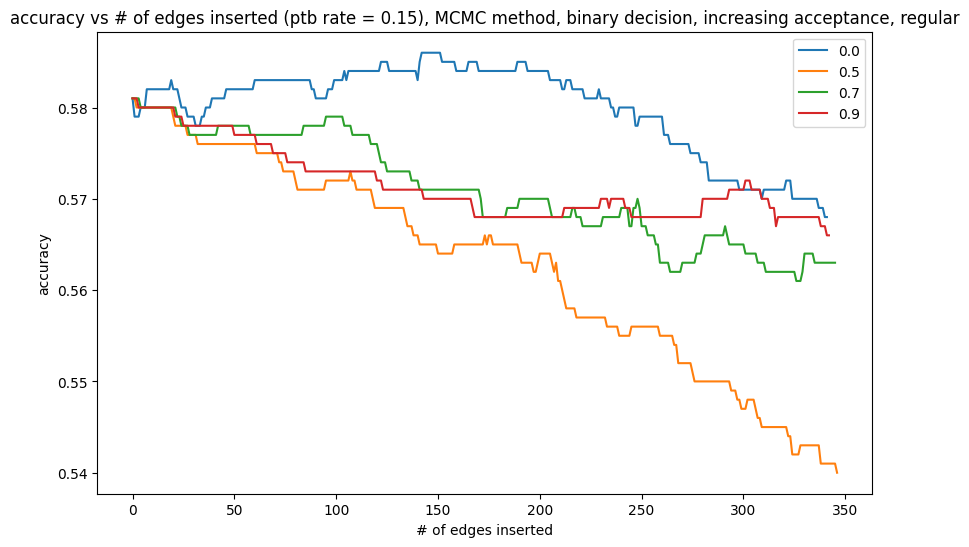

In [39]:
plot_results(split_dic_decreasing_acc, ptb_rate, "MCMC", "binary", "increasing", "accuracy", "regular")

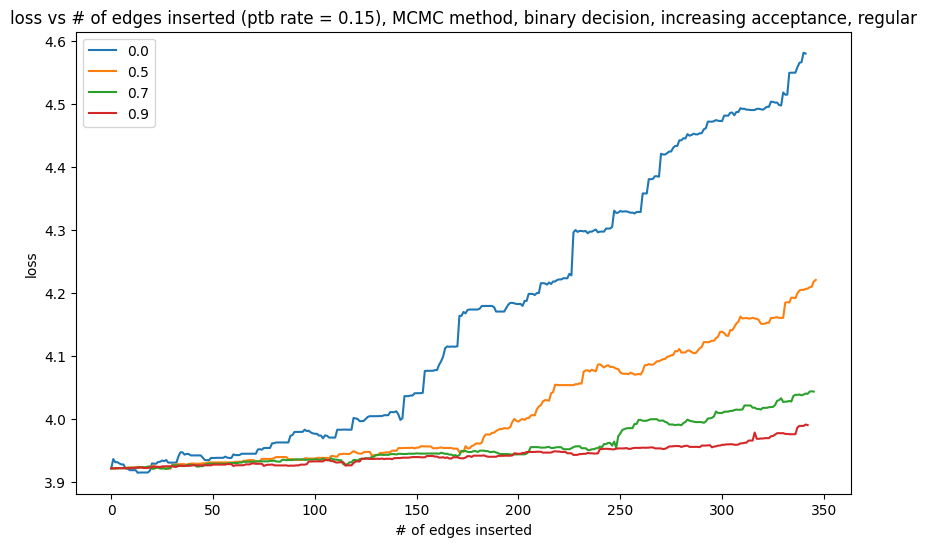

In [40]:
plot_results(split_dic_decreasing_loss, ptb_rate, "MCMC", "binary", "increasing", "loss", "regular")

In [41]:
split_dic_decreasing_constant_acc = defaultdict(list)
split_dic_decreasing_constant_loss = defaultdict(list)
itrs_three = defaultdict(int)

In [42]:
for s in splits:
    if s == 0.0:
        split_dic_decreasing_constant_acc[s], split_dic_decreasing_constant_loss[s], itrs_three[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_decreasing_constant_acc[s], split_dic_decreasing_constant_loss[s], itrs_three[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, decreasing_fn, constant_fn, device, is_reversed=False, verbose=True)

Peturbing graph...:   0%|          | 0/170 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.03921365737915039, master_clean_delta: -2.384185791015625e-07, master_dirty_delta: 0.0
Attempt: 16, Selected: 10
max_change: 0.03921365737915039, master_clean_delta: 0.033559560775756836, master_dirty_delta: 0.03753471374511719
Attempt: 17, Selected: 10
max_change: 0.03921365737915039, master_clean_delta: 0.033559560775756836, master_dirty_delta: 0.03802061080932617
Attempt: 41, Selected: 20
max_change: 0.03921365737915039, master_clean_delta: 0.0366358757019043, master_dirty_delta: 0.04494333267211914
Attempt: 42, Selected: 20
max_change: 0.03921365737915039, master_clean_delta: 0.03836178779602051, master_dirty_delta: 0.04666900634765625
Attempt: 43, Selected: 20
max_change: 0.03921365737915039, master_clean_delta: 0.03836178779602051, master_dirty_delta: 0.04666900634765625
Attempt: 44, Selected: 20
max_change: 0.03921365737915039, master_clean_delta: 0.037113189697265625, master_dirty_delta: 0.04496479034423828
Attempt: 45, Selected: 20
Attempt

Peturbing graph...:   0%|          | 0/176 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/102 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.03921365737915039, master_clean_delta: -2.384185791015625e-07, master_dirty_delta: -2.384185791015625e-07
Attempt: 1, Selected: 0
max_change: 0.03921365737915039, master_clean_delta: -0.0005710124969482422, master_dirty_delta: -0.0005714893341064453
Attempt: 2, Selected: 0
max_change: 0.03921365737915039, master_clean_delta: 0.0, master_dirty_delta: -2.384185791015625e-07
Attempt: 3, Selected: 0
max_change: 0.03921365737915039, master_clean_delta: -0.0009067058563232422, master_dirty_delta: -0.0012507438659667969
Attempt: 4, Selected: 0
max_change: 0.03921365737915039, master_clean_delta: -2.384185791015625e-07, master_dirty_delta: 0.0
Attempt: 19, Selected: 10
max_change: 0.03921365737915039, master_clean_delta: 0.03408670425415039, master_dirty_delta: 0.038019657135009766
Attempt: 46, Selected: 20
max_change: 0.03921365737915039, master_clean_delta: 0.03844094276428223, master_dirty_delta: 0.08621644973754883
Attempt: 90, Selected: 30
max_change:

Peturbing graph...:   0%|          | 0/107 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/34 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: 2.384185791015625e-07, master_dirty_delta: 2.384185791015625e-07
Attempt: 32, Selected: 10
max_change: 0.0392136549949646, master_clean_delta: 0.039986371994018555, master_dirty_delta: 0.045514583587646484
Attempt: 33, Selected: 10
max_change: 0.0392136549949646, master_clean_delta: 0.03877735137939453, master_dirty_delta: 0.04392695426940918
Attempt: 34, Selected: 10
max_change: 0.0392136549949646, master_clean_delta: 0.03877711296081543, master_dirty_delta: 0.04392695426940918
Attempt: 35, Selected: 10
max_change: 0.0392136549949646, master_clean_delta: 0.03549647331237793, master_dirty_delta: 0.04064583778381348
Attempt: 36, Selected: 10
max_change: 0.0392136549949646, master_clean_delta: 0.04188728332519531, master_dirty_delta: 0.04703664779663086
Attempt: 37, Selected: 10
max_change: 0.0392136549949646, master_clean_delta: 0.03966665267944336, master_dirty_delta: 0.04481649398803711
Attempt: 38, Selected: 

Peturbing graph...:   0%|          | 0/36 [00:00<?, ?it/s]

In [43]:
record1 = Recording(split_dic_decreasing_constant_loss, split_dic_decreasing_constant_acc, itrs_three, Model.GCN, Dataset.CITESEER, AcceptFn.CONSTANT, SelectFn.DECAYING, Reverse.ATTACKED)
record1.save(f'data_collection/{"mcmc"}_{"gcn"}_{"citeseer"}_{"constant"}_{"decaying"}_{"attacked"}_results.pkl')

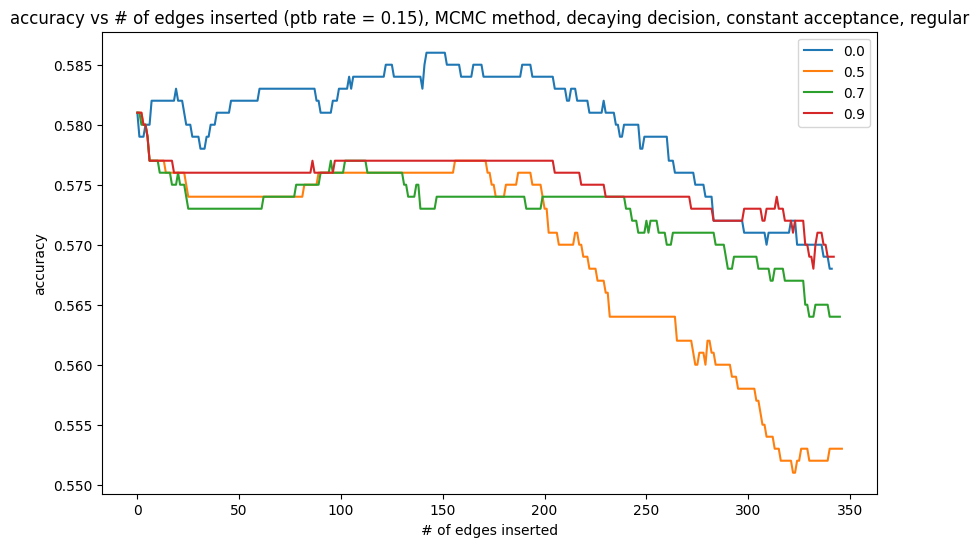

In [44]:
plot_results(split_dic_decreasing_constant_acc, ptb_rate, "MCMC", "decaying", "constant", "accuracy", "regular")

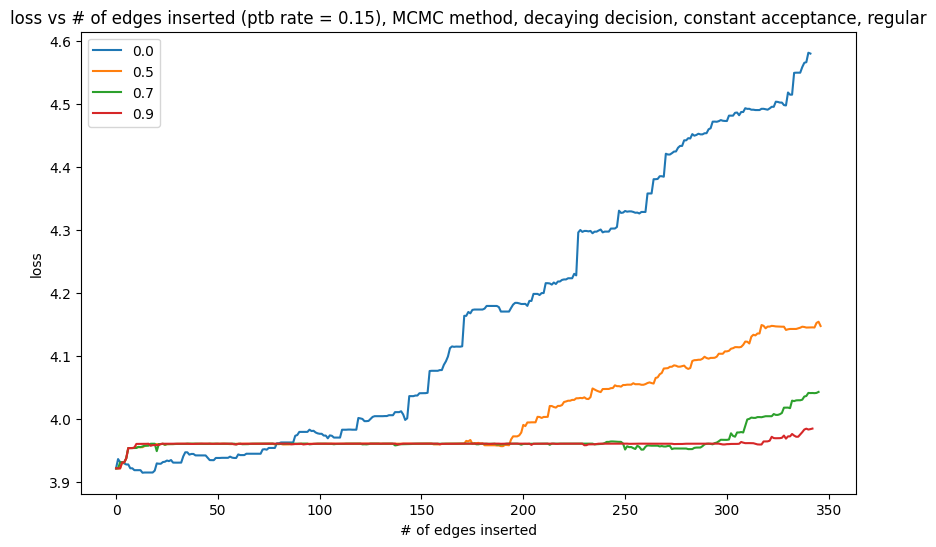

In [45]:
plot_results(split_dic_decreasing_constant_loss, ptb_rate, "MCMC", "decaying", "constant", "loss", "regular")

In [46]:
split_dic_decreasing_gradual_acc = defaultdict(list)
split_dic_decreasing_gradual_loss = defaultdict(list)
itrs_four = defaultdict(int)

In [ ]:
for s in splits:
    if s == 0.0:
        split_dic_decreasing_gradual_acc[s], split_dic_decreasing_gradual_loss[s], itrs_four[s] = full_metattack_acc, full_metattack_loss, full_metattack_itrs
    else:
        split_dic_decreasing_gradual_acc[s], split_dic_decreasing_gradual_loss[s], itrs_four[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, decreasing_fn, increasing_fn, device, is_reversed=False, verbose=True)

Peturbing graph...:   0%|          | 0/170 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.03921365737915039, master_clean_delta: -2.384185791015625e-07, master_dirty_delta: 0.0
Attempt: 47, Selected: 10
max_change: 0.03921365737915039, master_clean_delta: 0.008022069931030273, master_dirty_delta: 0.010665416717529297
Attempt: 48, Selected: 10
max_change: 0.03921365737915039, master_clean_delta: 0.002142190933227539, master_dirty_delta: 0.006430149078369141
Attempt: 74, Selected: 20
max_change: 0.03921365737915039, master_clean_delta: -0.0005123615264892578, master_dirty_delta: 0.01123189926147461
Attempt: 75, Selected: 20
max_change: 0.03921365737915039, master_clean_delta: 0.00025153160095214844, master_dirty_delta: 0.00975179672241211
Attempt: 76, Selected: 20
max_change: 0.03921365737915039, master_clean_delta: -0.0007040500640869141, master_dirty_delta: 0.011099815368652344
Attempt: 77, Selected: 20
max_change: 0.03921365737915039, master_clean_delta: 0.00025177001953125, master_dirty_delta: 0.011995792388916016
Attempt: 78, Selecte

Peturbing graph...:   0%|          | 0/176 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/102 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: 0.0, master_dirty_delta: 0.0
Attempt: 57, Selected: 10
max_change: 0.0392136549949646, master_clean_delta: 0.00183868408203125, master_dirty_delta: 0.002276182174682617
Attempt: 58, Selected: 10
max_change: 0.0392136549949646, master_clean_delta: 0.0025055408477783203, master_dirty_delta: 0.0029430389404296875
Attempt: 59, Selected: 10
max_change: 0.0392136549949646, master_clean_delta: -0.002521991729736328, master_dirty_delta: 0.00177764892578125
Attempt: 60, Selected: 10
max_change: 0.0392136549949646, master_clean_delta: 0.0009682178497314453, master_dirty_delta: 0.001405477523803711
Attempt: 61, Selected: 10
max_change: 0.0392136549949646, master_clean_delta: 5.0067901611328125e-05, master_dirty_delta: 0.0004878044128417969
Attempt: 62, Selected: 10
max_change: 0.0392136549949646, master_clean_delta: 0.006024837493896484, master_dirty_delta: 0.006462574005126953
Attempt: 63, Selected: 10
max_change: 0.0392

Peturbing graph...:   0%|          | 0/107 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/34 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.0392136549949646, master_clean_delta: 0.0, master_dirty_delta: 0.0
Attempt: 74, Selected: 10
max_change: 0.0392136549949646, master_clean_delta: -0.00047779083251953125, master_dirty_delta: -0.00036215782165527344
Attempt: 75, Selected: 10
max_change: 0.0392136549949646, master_clean_delta: 0.001155853271484375, master_dirty_delta: 0.001155853271484375
Attempt: 76, Selected: 10
max_change: 0.0392136549949646, master_clean_delta: 0.001155853271484375, master_dirty_delta: 0.001155853271484375
Attempt: 77, Selected: 10
max_change: 0.0392136549949646, master_clean_delta: 0.007592439651489258, master_dirty_delta: 0.007592439651489258
Attempt: 78, Selected: 10
max_change: 0.0392136549949646, master_clean_delta: 0.0006372928619384766, master_dirty_delta: 0.0006375312805175781
Attempt: 79, Selected: 10
max_change: 0.0392136549949646, master_clean_delta: 0.002194643020629883, master_dirty_delta: 0.002194643020629883
Attempt: 80, Selected: 10
max_change: 0.0

Peturbing graph...:   0%|          | 0/36 [00:00<?, ?it/s]

In [ ]:
record1 = Recording(split_dic_decreasing_gradual_loss, split_dic_decreasing_gradual_acc, itrs_four, Model.GCN, Dataset.CITESEER, AcceptFn.CONSTANT, SelectFn.DECAYING, Reverse.ATTACKED)
record1.save(f'data_collection/{"mcmc"}_{"gcn"}_{"citeseer"}_{"increasing"}_{"decaying"}_{"attacked"}_results.pkl')

In [ ]:
plot_results(split_dic_decreasing_gradual_acc, ptb_rate, "MCMC", "decaying", "increasing", "accuracy", "regular")

In [ ]:
plot_results(split_dic_decreasing_gradual_loss, ptb_rate, "MCMC", "decaying", "increasing", "accuracy", "regular")